# MTSU Computational Science
## Research Experience for Undergraduates

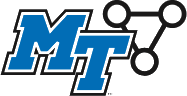

### Python Bootcamp - Module 1-E
#### Git Tutorial

Let's begin by establishing the fact that we can't possibly learn everything about git here, but we will cover the most important aspects involved in working with a team using remote git repositories to share and maintain code.

I will start from the assumption that you have a working SSH keypair for authenticating with Github. If not, then please make sure you find relevant instructions for doing so (installing your public SSH key using your account) before proceeding.

OK, so first, let's think a little about what a repository **is** and why it is useful. First, you need a place to maintain code where anyone can download and use it: this is what a git repository is to most people. Second, you need to be able to modify or make updates to your code and then upload them to the repository so that users can make use of your updates. Finally, you need to be able to understand how git helps you ensure that the integrity of the code is maintained even though **multiple** people are working on the code in the repository at the same time.

Let's start by pulling a repository down, making some changes and pushing them back into the repo. We are assuming a simple one-person development model at this point, and will move to multiple edits later on.

I will work from a local directory called `git-tutorial` within my home directory. From there I will start investigating a git repository and make some changes to it.

OK, let's pull down the `git-sandbox` repo from the website, and start looking around...

## Core Concept: Cloning

In [1]:
# Check where I currently am...
pwd

/nfshome/jphillips/git-tutorial


In [2]:
# Grab the repo from the web - note that I copy/pasted -after- the git clone command
git clone git@github.com:CSCI4850/git-sandbox.git

Cloning into 'git-sandbox'...
remote: Enumerating objects: 4, done.        
remote: Counting objects: 100% (4/4), done.        
remote: Compressing objects: 100% (3/3), done.        
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0        
Unpacking objects: 100% (4/4), done.


In [3]:
# Take a look at what we have...
ls -l

total 8
drwxr-xr-x 3 jphillips faculty 4096 Feb 25 11:47 git-sandbox
-rw-r--r-- 1 jphillips faculty 2457 Feb 25 11:47 Starting Up.ipynb


Note that I now have a new directory called `git-sandbox` in my working directory. I also have the notebook file that I am currently working on as well. However, let's go into the repo (which is just a standard directory) and look around.

## What's in a Repo?

In [4]:
cd git-sandbox
ls -la

total 20
drwxr-xr-x 3 jphillips faculty 4096 Feb 25 11:47 .
drwxr-xr-x 4 jphillips faculty 4096 Feb 25 11:49 ..
drwxr-xr-x 8 jphillips faculty 4096 Feb 25 11:47 .git
-rw-r--r-- 1 jphillips faculty 1083 Feb 25 11:47 LICENSE
-rw-r--r-- 1 jphillips faculty   46 Feb 25 11:47 README.md


In [5]:
ls -la .git

total 52
drwxr-xr-x 8 jphillips faculty 4096 Feb 25 11:47 .
drwxr-xr-x 3 jphillips faculty 4096 Feb 25 11:47 ..
drwxr-xr-x 2 jphillips faculty 4096 Feb 25 11:47 branches
-rw-r--r-- 1 jphillips faculty  268 Feb 25 11:47 config
-rw-r--r-- 1 jphillips faculty   73 Feb 25 11:47 description
-rw-r--r-- 1 jphillips faculty   23 Feb 25 11:47 HEAD
drwxr-xr-x 2 jphillips faculty 4096 Feb 25 11:47 hooks
-rw-r--r-- 1 jphillips faculty  209 Feb 25 11:47 index
drwxr-xr-x 2 jphillips faculty 4096 Feb 25 11:47 info
drwxr-xr-x 3 jphillips faculty 4096 Feb 25 11:47 logs
drwxr-xr-x 8 jphillips faculty 4096 Feb 25 11:47 objects
-rw-r--r-- 1 jphillips faculty  107 Feb 25 11:47 packed-refs
drwxr-xr-x 5 jphillips faculty 4096 Feb 25 11:47 refs


In [5]:
cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
[remote "origin"]
	url = git@github.com:CSCI4850/git-sandbox.git
	fetch = +refs/heads/*:refs/remotes/origin/*
[branch "master"]
	remote = origin
	merge = refs/heads/master


You can see that the repo contains two files: LICENSE and README.md which are the only "code" in the repository so far. However, it also contains a hidden directory, `.git`, which contains special files that help git understand that this directory contains a git repository. You should normally leave these files alone. In particular, if you remove the `.git` directory, then git will no longer be able to understand that this is a git repository, and you will no longer be able to use it as such.

One important thing to keep in mind about these repositories is that they are **complete** copies of the code **and** all code history. This means that each clone of the repo contains all changes made to the repository going all the way back to its initial creation. This would lead to a lot of bloat in size, but git usually just stores the *differences* between files (lines added and lines deleted) from your code (in a compressed form) to keep the repo a reasonable size.

Still, this had implications for your file management: **large data files** should normally **not** be stored in the repo. It would be better to keep those in a public web location, and have them be downloaded using the tools and scripts in the repo when needed. That being said, smaller files for project testing and debugging may be kept in the repo without adding too much bloat to the repository.

Because we now have a **complete** clone of the repo, it can be used completely *offline*. Any changes made can stored and managed using git's management tools, and can later be added to the remote repository when we go back *online*.

## Core Concept: Repo Status

In [7]:
# Take a look at the status of the repository
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


In [8]:
# Take a look at the README.md file...
cat README.md

# git-sandbox
Used to create the git-tutorial


In [13]:
# Make a change to the readme and see what this does
# -Append- to the README.md file...
echo "Something new added to the README file" >> README.md

In [14]:
# Check the updates
cat README.md

# git-sandbox
Used to create the git-tutorial
Something new added to the README file


In [16]:
# What has changed? Check the status!
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

no changes added to commit (use "git add" and/or "git commit -a")


Notice how git status can see that the file `README.md` has been modified?

It can even tell you what those current changes are in `diff` format...

In [17]:
# How is it different from what was there before?
git diff

diff --git a/README.md b/README.md
index d756b0b..b971340 100644
--- a/README.md
+++ b/README.md
@@ -1,2 +1,3 @@
 # git-sandbox
 Used to create the git-tutorial
+Something new added to the README file


The additions and deletions will be shown for lines (+ and -, respectively). However, to make these changes "permanent" we will need to package them up into a `commit`. We can also add additional changes into a commit; in fact there is no real limitation in how many changes we want to compile into a single commit. Let's make one more addition by creating a new file for the repository called `something.txt`.

In [18]:
echo "Here we put some text into the text file." >> something.txt

In [19]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	something.txt

no changes added to commit (use "git add" and/or "git commit -a")


You can see that the status command tells us about modifications to files that were already in the repo (changes not staged for commit) and new files that it is not yet aware that you want to include (untracked files). Given that this file is not tracked, it will not show up in our `git diff` output, but we can `add` it to the next commit and it will begin to do so.

Before we add the new file, let's keep in mind that the edited file (README.md) will *also* need to be added as well. Why? Well, git needs to know explicitly which files you would like to include in a commit. Since the commit has a kind of permanence (a little tedious to reverse), git wants to make sure you are ready to include any changes before it will do so.

Let's see what creating a commit will look like...

## Core Concept: Commit

In [20]:
# Let's just try to run a commit and see what happens..
git commit

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
	modified:   README.md

Untracked files:
	something.txt

no changes added to commit


: 1

There was a non-zero exit status to the command (hence the red `: 1`) at the end. More importantly, the command clearly reports: no changes added to commit. Therefore, it can't complete the request. Therefore, we need to first add relevant changes or new files before a commit can be created. Also, using `git status` can keep us up-to-date on the progress of adding these updates to the commit. **Let's try just adding the new file first...**

In [21]:
git add something.txt

In [22]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   something.txt

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md



Notice that git had now put the new file into a section called "changes to be committed". This section shows what updates will be performed in the next commit. However, it also provides commands for reversing this process if, for example, you accidentally added the wrong file. Let's reverse that action on the file using the suggested command above:

In [23]:
git reset HEAD something.txt

Unstaged changes after reset:
M	README.md


In [24]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	something.txt

no changes added to commit (use "git add" and/or "git commit -a")


You can see how the file has now reversed its status **back** to being untracked. Let's see what happens when we add the edited README.md file instead...

In [25]:
git add README.md

In [26]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	something.txt



The modified file has now been added to the list of "changes to be committed" and we could reverse this with the provided command just like we did above. However, let's go ahead and add the new text file `something.txt` back to the staging area...

In [27]:
git add something.txt

In [28]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md
	new file:   something.txt



Now we can see what all of our changes are ready to be put into a commit. The **commit is the basic transactional unit** when working with a git repo, and you should normally make commits often even for relatively small changes to the code. The reason for this is that even though a commit has a more "permanent" feel to it (as we will see in a moment), they **are** reversable as well and can be shared with others who would like to clone the repo in the future. Let's take a look at the log that git creates before performing this commit...

In [29]:
# Print the commit history for this branch of the repo...
git log

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


So far there is only one commit in the repo history, and this one I created using the Github web interface when I first created the repository. However, I would now like to add my new changes (all staged and ready to go) into a new commit to the repository. For this, we will also create a small status message that describes the general purpose behind the update.

In [30]:
git commit -m "A little commit to demonstrate how to make a commit to a repo"

[master 1bfffdf] A little commit to demonstrate how to make a commit to a repo
 2 files changed, 2 insertions(+)
 create mode 100644 something.txt


In [31]:
git log

commit 1bfffdfb223ebb66d4a82857b496105b1da98cb5
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 12:56:27 2019 -0600

    A little commit to demonstrate how to make a commit to a repo

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


A successful commit to the repository! It's also now recorded in the log for the repo! Notice what happens how when I check the status of the repo...

In [32]:
git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
nothing to commit, working tree clean


There is nothing to commit since they current "code" is all consistent with the latest commit to the repository. However, this doesn't make the changes immediately visible to other users of the repository. You can see this by how git tells us "your branch is ahead of origin/master by 1 commit". This means we have some *offline* changes that we have made, and we would need to update the remote branch to make this so. Our own local branch on which we are working is just called `master` and the remote branch that we would like to update is therefore called `origin/master` where our origin is the original repository that we cloned (out there on github).

Before we move this commit into the remote repository, let's take a look at how we can use the log information to compare commits...

In [33]:
git diff 92d29e1be02ad5fa289201815babfb7a31699882

diff --git a/README.md b/README.md
index d756b0b..b971340 100644
--- a/README.md
+++ b/README.md
@@ -1,2 +1,3 @@
 # git-sandbox
 Used to create the git-tutorial
+Something new added to the README file
diff --git a/something.txt b/something.txt
new file mode 100644
index 0000000..2c814fa
--- /dev/null
+++ b/something.txt
@@ -0,0 +1 @@
+Here we put some text into the text file.


The diff command can be used to compare the current commit to past commits by providing the hash sum (as shown above). You can also provide two different hash sums to compare *any* two different commits directly to one another.

However, we will use this opportunity to show how to undo a previous commit in case we have changed our mind about these changes. This will work with our local clone of the repo, but it's a little more difficult to remove a commit once it has been uploaded/pushed onto github.

## Core Concept: Reset

Before we jump right into removing the commit, we will first move back to a previous version of the code (the last commit) and then store those changes so we can apply them later (redo the commit **after** we have removed it from the repo). Let's start by undoing the last commit.

In [34]:
git reset --soft HEAD~1

In [35]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md
	new file:   something.txt



Here we have backed up one commit (~1). Instead, we could have specified a specific commit to move to using it's hash sum (like we provided to git diff earlier). However, one other detail is important: the `--soft` option. This option leaves the files with their modifications, but staged to go into a subsequent commit.

You should notice that we always use the keyword `HEAD` to refer to the current commit on which we are working. After resetting to one previous commit, this has become the new `HEAD`.

For now, I would like to preserve these changes **temporarily** and then apply them as a new commit later on. For this, we can use `stash`.

In [45]:
git stash

Saved working directory and index state WIP on master: 92d29e1 Initial commit
HEAD is now at 92d29e1 Initial commit


In [46]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


In [49]:
ls -l

total 8
-rw-r--r-- 1 jphillips faculty 1083 Feb 25 11:47 LICENSE
-rw-r--r-- 1 jphillips faculty   46 Feb 25 19:17 README.md


We have completely cleaned the working directory from any noticable changes from the initial commit. However, we can accomplish this same process in a more direct way by using a hard reset (instead of a soft one like the above).

Let's make the commit once more before we try this...

In [50]:
git stash apply

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   something.txt

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md



In [51]:
git add README.md
git status

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md
	new file:   something.txt



You can see that `stash apply` command will take the last stashed changes (compared to HEAD) and apply them to the repository.

Now we can make the commit again, and then we will remove it using a *hard* reset.

In [59]:
git commit -m "Changes applied a second time"

[master fd319db] Changes applied a second time
 2 files changed, 2 insertions(+)
 create mode 100644 something.txt


In [60]:
git log

commit fd319dbf6a1712b1b318863e43cd8644cf3efa12
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:30:26 2019 -0600

    Changes applied a second time

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


OK, now we are ready to remove that last commit. Since we aren't using a soft reset, the changes will simply be **removed** from the directory. There is no way to get them back unless they were pushed/stored in some other repo (like origin/master on github). Therefore, it's important to be careful when resetting to an earlier commit in this way.

In [61]:
ls

LICENSE  README.md  something.txt


In [62]:
git reset --hard HEAD~1

HEAD is now at 92d29e1 Initial commit


In [63]:
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


In [64]:
ls

LICENSE  README.md


Note that you need to **be careful** when using a hard reset since you lose the changes made since that commit, and they are now *permanently* gone.

Luckily, I had the last changes stashed, so I can still get them back. However, the only reason I can is because I performed a soft reset (the default) beforehand and was able to stash those changes. Stashed changes are not a commit of any kind, and are particular to your local clone of the repository. You will have to apply such changes and add/commit them to have any permanent impact. Let's put those changes back now.

In [65]:
git stash apply

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   something.txt

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md



In [66]:
git add README.md
git commit -m "Third time is the charm"

[master 537895a] Third time is the charm
 2 files changed, 2 insertions(+)
 create mode 100644 something.txt


We have now made a commit that we would like to store on the remote server on github so that others can access those changes.

## Core Concept: Push

Let's check the status one last time before we send it to the cloud...

In [67]:
git status

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
nothing to commit, working tree clean


Our repository thinks it is one commit ahead of the `origin/master` repo, but I want to emphasize that it only **thinks** that this is the case. It really only reports this because we are one commit ahead from `origin/master` from *when we cloned it*. If others had made some commits and added them to `origin/master` **since** our last contact with the repo, then this may not be true. However, we will deal with that situation a little later. For now, I'm the only person working on the repo, so this can't have happened. Let's send that commit to github!

In [6]:
git push

Counting objects: 4, done.
Delta compression using up to 64 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 461 bytes | 0 bytes/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:CSCI4850/git-sandbox.git
   92d29e1..537895a  master -> master


This commit has now been moved to the github server, and will be available for others when they clone the repo from there or update their local repo using a push.

## Core Concept: Pull

Now that we can push something to the github repo, we need to see how to perform a pull where we get more recent changes to the repo from github. While we could make another clone of the repository, this would be a waste of space and we could instead easily pull down the recent commits and update our local repo.

However, you will note that I am the only one working on this repo. Therefore, I am going to create a new clone of the repo in a different location in order to **simulate** another user. This is actually not all that uncommon since you might want to say work on the code on your own computer as well as the biosim machines. You can easily do this, but you will have a different local clone of the repo on each system and you would need to use the push/pull process to keep them in sync with one another.

Let's create another clone of the repo in a **different** subdirectory...

In [7]:
mkdir ../other-user
cd ../other-user
git clone git@github.com:CSCI4850/git-sandbox.git

Cloning into 'git-sandbox'...
remote: Enumerating objects: 8, done.        
remote: Counting objects: 100% (8/8), done.        
remote: Compressing objects: 100% (6/6), done.        
remote: Total 8 (delta 0), reused 4 (delta 0), pack-reused 0        
Receiving objects: 100% (8/8), done.


As this other user, I am going to create a commit and push it to the repo on github...

In [8]:
cd git-sandbox
git log

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


In [9]:
echo "A little change from another coder" >> README.md
git add README.md
git commit -m "Other user updates the repo"
git log

[master 3ed1b9a] Other user updates the repo
 1 file changed, 1 insertion(+)
commit 3ed1b9aeaa378827a52ef3d5d3bc83aea43af8e5
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:23:45 2019 -0600

    Other user updates the repo

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


In [10]:
git push

Counting objects: 3, done.
Delta compression using up to 64 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 401 bytes | 0 bytes/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.        
To github.com:CSCI4850/git-sandbox.git
   537895a..3ed1b9a  master -> master


OK, now I will switch back to my **first** clone and see what things look like over there...

In [11]:
# Switch to -first- clone
cd ../../git-sandbox
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


In [12]:
git log

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


Now that we have switched back, we can see that the first clone is unaware of the changes made by the other user. This isn't surprising since we were simulating this exact situation above. However, we can now use the `pull` command to grab those changes from `origin/master` and update our local `master` branch...

In [13]:
git pull

remote: Enumerating objects: 5, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Compressing objects: 100% (2/2), done.        
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0        
Unpacking objects: 100% (3/3), done.
From github.com:CSCI4850/git-sandbox
   537895a..3ed1b9a  master     -> origin/master
Updating 537895a..3ed1b9a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)


In [14]:
git log

commit 3ed1b9aeaa378827a52ef3d5d3bc83aea43af8e5
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:23:45 2019 -0600

    Other user updates the repo

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


It's important to realize that this is the typical way that a pull will work if a repo doesn't get updated very often, but it can get more complicated if we had new commits that we created before the pull. Let's simulate one more update, and then jump back again...

In [15]:
cd ../other-user/git-sandbox

In [16]:
echo "And another from the other coder" >> README.md
git add README.md
git commit -m "Another update from the -other- user"
git push

[master c7576f2] Another update from the -other- user
 1 file changed, 1 insertion(+)
Counting objects: 3, done.
Delta compression using up to 64 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 397 bytes | 0 bytes/s, done.
Total 3 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.        
To github.com:CSCI4850/git-sandbox.git
   3ed1b9a..c7576f2  master -> master


In [17]:
# Change back to -first- clone!!
cd ../../git-sandbox
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


Now that we are back, let's try to make a new commit of our own before we pull the changes from the other user. This is a typical scenario since another user might make some commits and push while we are still working on some commits of our own. Let's make a new commit now...

In [18]:
echo "Original user updates the README" >> README.md
git add README.md
git commit -m "A new change for my original clone"
git log

[master 05f1488] A new change for my original clone
 1 file changed, 1 insertion(+)
commit 05f1488e1e98299040d5bc1706485b47539a99a8
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:35:09 2019 -0600

    A new change for my original clone

commit 3ed1b9aeaa378827a52ef3d5d3bc83aea43af8e5
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:23:45 2019 -0600

    Other user updates the repo

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


Notice that the new commit from the other user is not present. Instead, we have added a commit of our own on top of the same commit. We won't become aware of this problem until we try to perform a pull. Git will let us know what's going on when this happens...

## Core Concept: Merging

In [19]:
git pull

remote: Enumerating objects: 5, done.        
remote: Counting objects: 100% (5/5), done.        
remote: Compressing objects: 100% (2/2), done.        
remote: Total 3 (delta 1), reused 3 (delta 1), pack-reused 0        
Unpacking objects: 100% (3/3), done.
From github.com:CSCI4850/git-sandbox
   3ed1b9a..c7576f2  master     -> origin/master
Auto-merging README.md
CONFLICT (content): Merge conflict in README.md
Automatic merge failed; fix conflicts and then commit the result.


: 1

**IF** we had only altered files which were *not* altered by the latest commits (no overlaps) then the pull would have just **automatically** merged those changes with our local clone and update the log appropriately as well. However, since we have made a change to the README that *conflicts* with the change made by the other user, we are now forced to **fix** the conflict manually and then package it up as a new commit.

In [20]:
cat README.md

# git-sandbox
Used to create the git-tutorial
Something new added to the README file
A little change from another coder
<<<<<<< HEAD
Original user updates the README
And another from the other coder
>>>>>>> c7576f2c262551c45aa020578dbf9ce65e1b9881


You can see that git adds some special information to the conflicting file by showing **both** sets of changes in the same file. We can either choose the version we want, or make an updated version with both changes. This will require coding expertise in most cases...

In [21]:
git status

On branch master
Your branch and 'origin/master' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)
You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)

	both modified:   README.md

no changes added to commit (use "git add" and/or "git commit -a")


Notice that status can really help resolve potential issues that arise. If we are not ready to work on merging the conflicting versions of the code, then we can put it off until later by aborting the merge. Let's try that now...

In [22]:
git merge --abort

In [23]:
git status
git log

On branch master
Your branch and 'origin/master' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)
nothing to commit, working tree clean
commit 05f1488e1e98299040d5bc1706485b47539a99a8
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:35:09 2019 -0600

    A new change for my original clone

commit 3ed1b9aeaa378827a52ef3d5d3bc83aea43af8e5
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:23:45 2019 -0600

    Other user updates the repo

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa289201815babfb7a31699882
Author: Joshua L. Phillips <Joshua.Phillips@mtsu.edu>
Date:   Mon Feb 25 10:20:29 2019 -0600

    Initial commit


While this **doesn't actually fix** the problem, we can at least see that there might be something to do once we try to pull since our commits differ from those in `origin/master`. We could continue working in our local clone and adding as many commits as we want in this state, and perform the merge later on. However, let's just go ahead and bite the bullet here and fix the merge... 

In [24]:
git pull

Auto-merging README.md
CONFLICT (content): Merge conflict in README.md
Automatic merge failed; fix conflicts and then commit the result.


: 1

In [25]:
cat README.md

# git-sandbox
Used to create the git-tutorial
Something new added to the README file
A little change from another coder
<<<<<<< HEAD
Original user updates the README
And another from the other coder
>>>>>>> c7576f2c262551c45aa020578dbf9ce65e1b9881


Now, I will open up this file in a text editor and fix the issues. At this point, I think I would like to keep **both** updates to the README, so I can just remove the commit separators from the file. I'll edit the file and then print it out again so we can see the updated version...

In [26]:
cat README.md

# git-sandbox
Used to create the git-tutorial
Something new added to the README file
A little change from another coder
Original user updates the README
And another from the other coder


In [27]:
git status

On branch master
Your branch and 'origin/master' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)
You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)

	both modified:   README.md

no changes added to commit (use "git add" and/or "git commit -a")


Now that we have fixed the code, we can package up this **merge** into a commit to show when the merge occurred in the log.

In [28]:
git add README.md
git status

On branch master
Your branch and 'origin/master' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)
All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:

	modified:   README.md



In [29]:
git commit -m "Merging README.md from two different users"

[master 26a8ff4] Merging README.md from two different users


In [30]:
git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)
nothing to commit, working tree clean


Note how the merge has worked: there are 2 new commits.

In [31]:
git log

commit 26a8ff49de531d27acdf75da3e29a7680e15ffbf
Merge: 05f1488 c7576f2
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:55:09 2019 -0600

    Merging README.md from two different users

commit 05f1488e1e98299040d5bc1706485b47539a99a8
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:35:09 2019 -0600

    A new change for my original clone

commit c7576f2c262551c45aa020578dbf9ce65e1b9881
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:32:50 2019 -0600

    Another update from the -other- user

commit 3ed1b9aeaa378827a52ef3d5d3bc83aea43af8e5
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 20:23:45 2019 -0600

    Other user updates the repo

commit 537895a9f4a2728f19eb5ab67a6447c7760d4588
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 19:37:29 2019 -0600

    Third time is the charm

commit 92d29e1be02ad5fa2892018

Let's publish that change to the repo with a push...

In [32]:
git push

Counting objects: 6, done.
Delta compression using up to 64 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 766 bytes | 0 bytes/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 1 local object.        
To github.com:CSCI4850/git-sandbox.git
   c7576f2..26a8ff4  master -> master


This was a fairly common issue that can happen: we pull and need to complete a merge. After the merge, we can push the changes to the repo.

However, there is another issue that can arise: what if we had just made our commit and tried to push it **before** we pulled?

Let's see...

In [33]:
# Add a commit from the other user
cd ../other-user/git-sandbox

In [35]:
echo "Yet another change from the other user" >> README.md
git add README.md
git commit -m "Changing in order to push -before- pulling"

[master 5e8f8d7] Changing in order to push -before- pulling
 1 file changed, 1 insertion(+)


In [36]:
# Push the commit!
git push

To github.com:CSCI4850/git-sandbox.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'git@github.com:CSCI4850/git-sandbox.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


: 1

So, the other user tried to make a commit and then push it immediately. This will be **rejected** since we made the earlier merge (and pushed the correspnding commit) since this user tried to do this. There is no way for git to automatically merge the conflicting files, so it requires you to perform a pull **first** and manage the merge before this user can complete the push. Notice that we could easily have ended up in the same situation above in our first clone of the repo if we had attempted to push there before the pull.

## Core Concept: Branching

These merges can get to be quite a pain if they need to be performed often, yet it's important to commit/push often to ensure that the code is backed-up and available to others on the team ASAP. So, how do we publish changes often without slowing down development? How do we delay the merge until we are really ready to tackle it? To solve this, we need branching.

So far, we have building on top of the `master` branch which it typically (99% of the time) the **primary** branch of the repository. A typical model for working on a project where we want the master branch to stay pretty stable and only rarely updated is instead to have separate branch for code development (we will just call ours **development**). This other branch will be created from the master branch by choosing a commit from which to start (we can just let it be the current commit in our repository).

You can do this at any time, but it might be a good time to *make our new branch right now*, since we currently have a conflict but we would still prefer to push our version to the repository so that others might benefit or use it. So, making a new branch would allow us to do this...

In [39]:
# Check your current branch
git branch

* master


We can see there is currently only one branch (master) and we are using it (as indicated by the \*).

When we make a new branch, it will be based off of our current branch's HEAD commit. Remember, this will use our *local* master branch as the base, so we still don't have the updates from the first user when we make this branch. Still, it's easy enough to start branching and see how we can use it to store our updates for later...

In [40]:
# Make a new branch 'development'
git branch development

In [41]:
git branch

  development
* master


Notice that we have made a new branch, but it's currently not active. Let's take a look a look at the log (just the latest commit) and see what happens when we switch to the new branch...

In [42]:
git log -1

commit 5e8f8d72f71dd96e318adb1ee093760a68f44fd8
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 21:01:46 2019 -0600

    Changing in order to push -before- pulling


The `-1` option to the log command will just show the last commit made (HEAD), which was the one we used for creating the branch.

Let's switch branches now using the `checkout` command.

In [43]:
git checkout development

Switched to branch 'development'


In [44]:
git branch

* development
  master


In [45]:
git log -1

commit 5e8f8d72f71dd96e318adb1ee093760a68f44fd8
Author: Dr Joshua Lee Phillips <joshua.lee.phillips@gmail.com>
Date:   Mon Feb 25 21:01:46 2019 -0600

    Changing in order to push -before- pulling


Looks the same right? Well, everything except we have now moved over to used the development branch in the repository. Given that we are now on a separate branch from the master branch, we should be able to push these changes to github.

**IF** this branch already existed, then this would be straightfoward, but there are some additional steps that need to be taken when a new branch is created since the remote repo has **no idea** that you want to have it track this branch. You **could** just use it to work temporarily (allowing you to use commits and revision history as you make changes) until you decide to merge it into the master branch. However, let's assume you **really** want this new branch backed-up and available on the github repo...

In [46]:
# Attempt remote branch creation by pushing
git push

fatal: The current branch development has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin development



: 128

Git doesn't know where to put the new branch because there is currently not one on the server. Also, you can actually have a **local** branch which tracks a **remote** branch of a **different name** if you would like. However, let's keep it straightforward here and just say that we want to use a branch named development from the github repo (origin) as our remote branch. For this, we just need to follow those helpful instructions above and set the current branch to track the remote (origin's) development branch as it's **upstream** repository. This is typically how you will want your branches to behave in most cases...

In [47]:
git push --set-upstream origin development

Counting objects: 17, done.
Delta compression using up to 64 threads.
Compressing objects: 100% (15/15), done.
Writing objects: 100% (17/17), 2.69 KiB | 0 bytes/s, done.
Total 17 (delta 3), reused 7 (delta 0)
remote: Resolving deltas: 100% (3/3), done.        
remote: 
remote: Create a pull request for 'development' on GitHub by visiting:        
remote:      https://github.com/CSCI4850/git-sandbox/pull/new/development        
remote: 
To github.com:CSCI4850/git-sandbox.git
 * [new branch]      development -> development
Branch development set up to track remote branch development from origin.


By this action, we have set up a **new** branch on the remote server (origin) by the name `development` and have then set our local branch named `development` to track that one for upstream changes. Upstream changes are the kind where someone else makes a change before you do. So, others who have write access to the same repository will also be able to have access to this branch and potentially put you in the same position as we were already in with master! This requires team coordination, where team members are aware of who is working from certain branches.

In fact, you may want to go so far as to make only **one person** responsible for updating master, just to make sure that it doesn't get updated too often. You may then want to have a development branch to which everyone may push, but **communicate** before such changes are made. Then, each team member might maintain a personal branch (made based off of development) which only that team member will directly work on/from. It's possible to merge changes between such branches when needed, and this can be coordinated as needed. However, I still even make a new **local** branch based off of my personal branch before I perform any merges with it, just to ensure that nothing gets lost in a complicated merge. OK, this are mostly just suggestions/warnings for now (and are not necessarily even best practices) but there are even better ways to do this. This would be enough to get the ideas flowing, but we will see an example of a more safe way to merge changes than this model in the future.

OK, so back to the plan. What about if I need to delete a branch? For example, here 

Copyright &copy; 2022 Joshua L. Phillips